<a href="https://colab.research.google.com/github/turusan-asak/Transfer_Learning_Project/blob/main/Transfer_Learning_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Görüntülerin Colab Ortamına İndirilmesi

In [1]:
!wget https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_5340.zip

--2022-08-29 19:05:51--  https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_5340.zip
Resolving download.microsoft.com (download.microsoft.com)... 184.87.200.253, 2600:1413:b000:28e::317f, 2600:1413:b000:29a::317f
Connecting to download.microsoft.com (download.microsoft.com)|184.87.200.253|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 824887076 (787M) [application/octet-stream]
Saving to: ‘kagglecatsanddogs_5340.zip’

kagglecatsanddogs_5 100%[===================>] 786.67M   225MB/s    in 3.5s    

2022-08-29 19:05:54 (223 MB/s) - ‘kagglecatsanddogs_5340.zip’ saved [824887076/824887076]



### Zip Dosyasının Açılması

In [2]:
# '-q' açılan dosyaların isimlerinin bastırılmasını engeller
!unzip -q kagglecatsanddogs_5340.zip

In [3]:
# Zip dosyasını silmek için komut
!rm kagglecatsanddogs_5340.zip

## Gerekli Kütüphaneler

In [4]:
import os
from tqdm import tqdm #ilerleme çubuğu için
import cv2 #yeniden boyutlandırma ve görüntüleri yüklemek için OpenCV kütüphanesi
import numpy as np
import matplotlib.pyplot as plt
import random

## Görüntülerin Önişlemesi
Görüntüleri sırasıyla okuyarak, hepsinin aynı boyuta getirilmesi (resizing), normalizasyon yapılması, her bir görüntüyü etiketiyle birlikte, [görüntü, etiket] formatında bir listeye eklenmesi, görüntülerin karıştırılması (shuffling).

In [5]:
categories = ["Cat", "Dog"]
dir = "PetImages"
size = 128

images = []
counter = 0

for category in categories:
  dir_path = os.path.join(dir, category)
  label = categories.index(category) # etiket 0 -> Cat 1 -> Dog
  for image in tqdm(os.listdir(dir_path)): # görüntülerin sırasıyla okunması
    try:
      img_path = os.path.join(dir_path, image)
      img = cv2.imread(img_path)
      img = cv2.resize(img, (size, size)) # görüntülerin aynı boyuta getirilmesi
      images.append([img, label])
      counter += 1
    except:
      print(image) # boyut değiştirirken sorun yaşanan dosyalar
    if counter == 2500: # 2500 kedi ve 2500 köpek görüntüsü için sayaç
      counter = 0
      break



  1%|          | 106/12501 [00:00<00:33, 375.46it/s]

11565.jpg


  5%|▍         | 611/12501 [00:01<00:26, 454.42it/s]

9171.jpg


 10%|▉         | 1220/12501 [00:03<00:29, 384.62it/s]

4833.jpg


 13%|█▎        | 1645/12501 [00:04<00:22, 485.38it/s]

11935.jpg
660.jpg


 17%|█▋        | 2075/12501 [00:04<00:23, 453.02it/s]

7978.jpg


  1%|          | 143/12501 [00:00<00:26, 459.89it/s]

8730.jpg
2384.jpg


  7%|▋         | 930/12501 [00:02<00:26, 444.42it/s]

6718.jpg


  9%|▊         | 1066/12501 [00:02<00:25, 440.94it/s]

7112.jpg


 10%|█         | 1299/12501 [00:02<00:24, 448.14it/s]

11849.jpg


 15%|█▌        | 1924/12501 [00:04<00:24, 438.38it/s]

11702.jpg


 17%|█▋        | 2156/12501 [00:04<00:22, 455.81it/s]

10158.jpg


 19%|█▉        | 2389/12501 [00:05<00:22, 447.23it/s]

5604.jpg


 20%|██        | 2507/12501 [00:05<00:22, 441.81it/s]


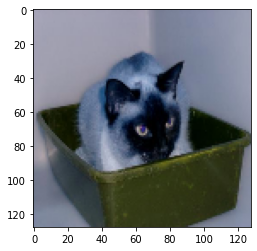

In [6]:
plt.imshow(images[300][0]);

In [7]:
# görüntüleri karıştırmak için -> modelin sıralamadan bağımsız eğitilmesi için
random.shuffle(images)

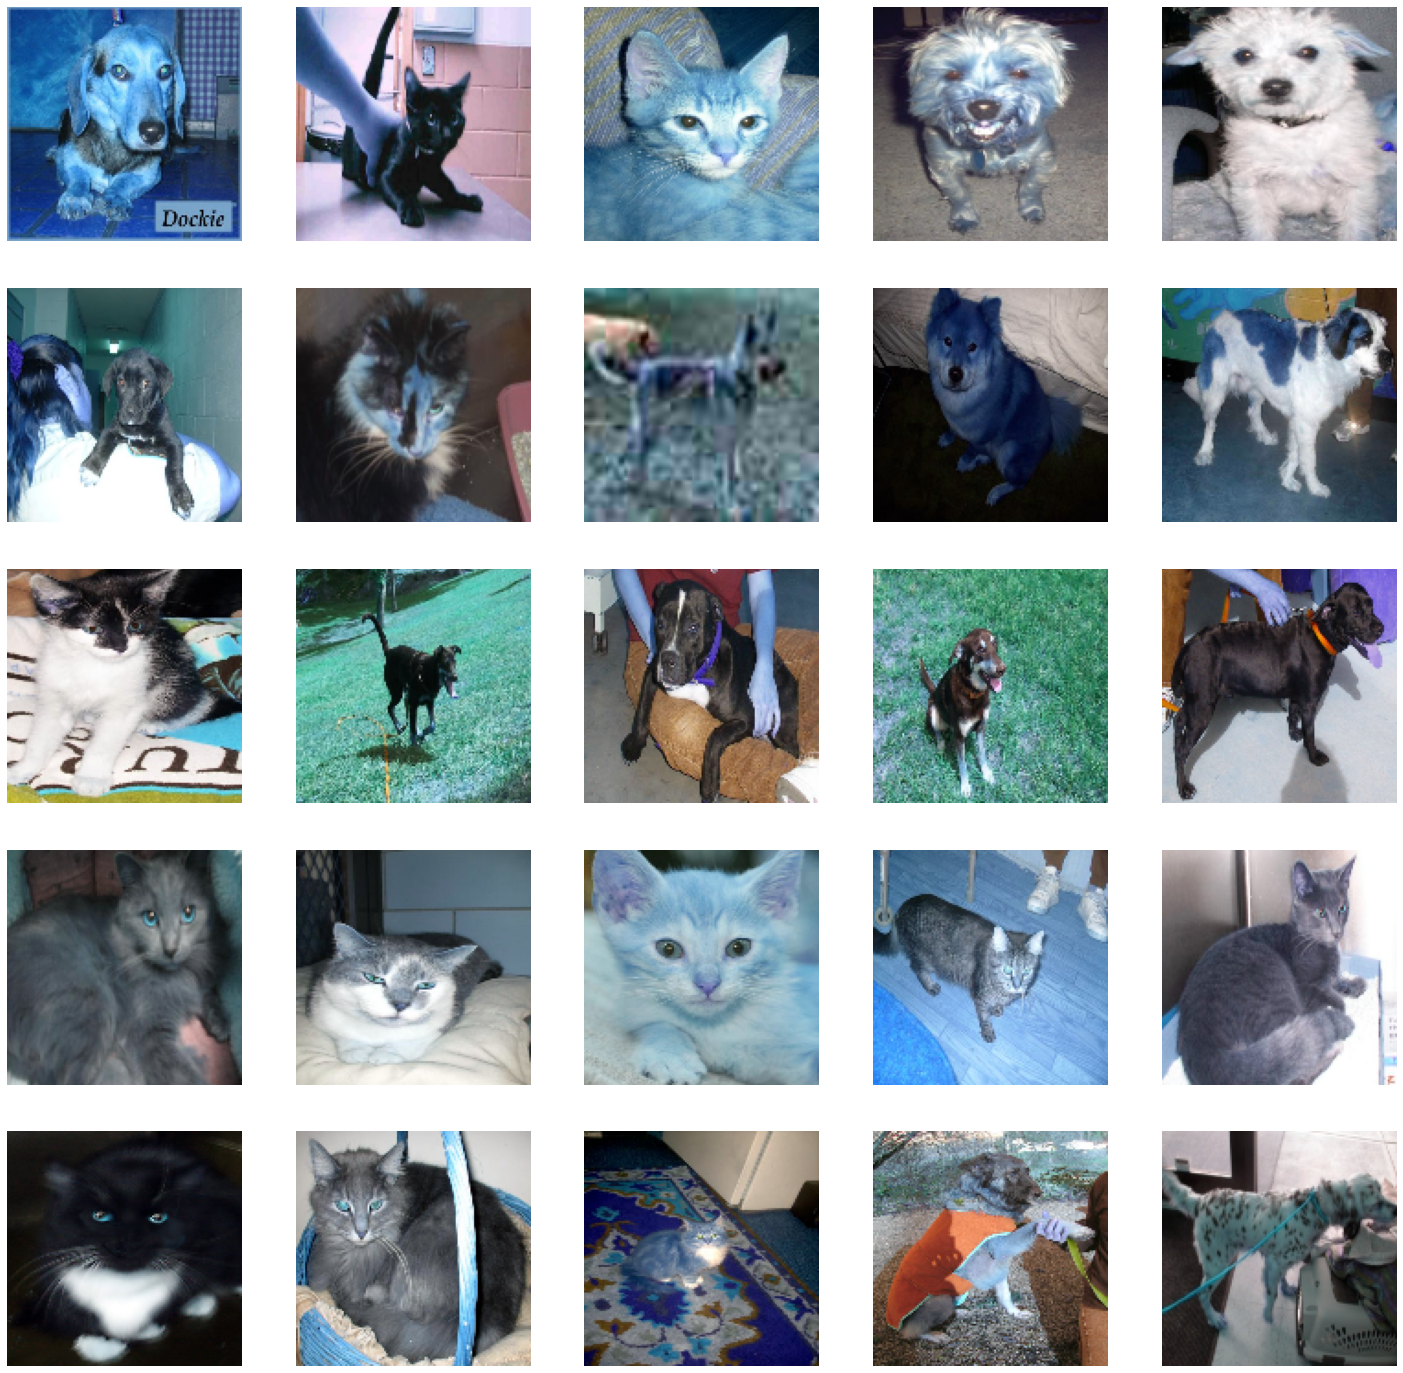

In [8]:
# görüntüler karıştırıldıktan sonraki ilk 25 görüntü
plt.figure(figsize=(25,25))

for i in range(25):
  plt.subplot(5,5, i+1)
  plt.imshow(images[i][0])
  plt.axis("off")


In [9]:
# görüntüleri ve etiketleri ayrı listelere koyalım

X = [] # görüntüler
Y = [] # etiketler

for x,y in images:
  X.append(x)
  Y.append(y)

del images # RAM'de yer açmak için siliyoruz çünkü zaten içindeki verilere sahibiz

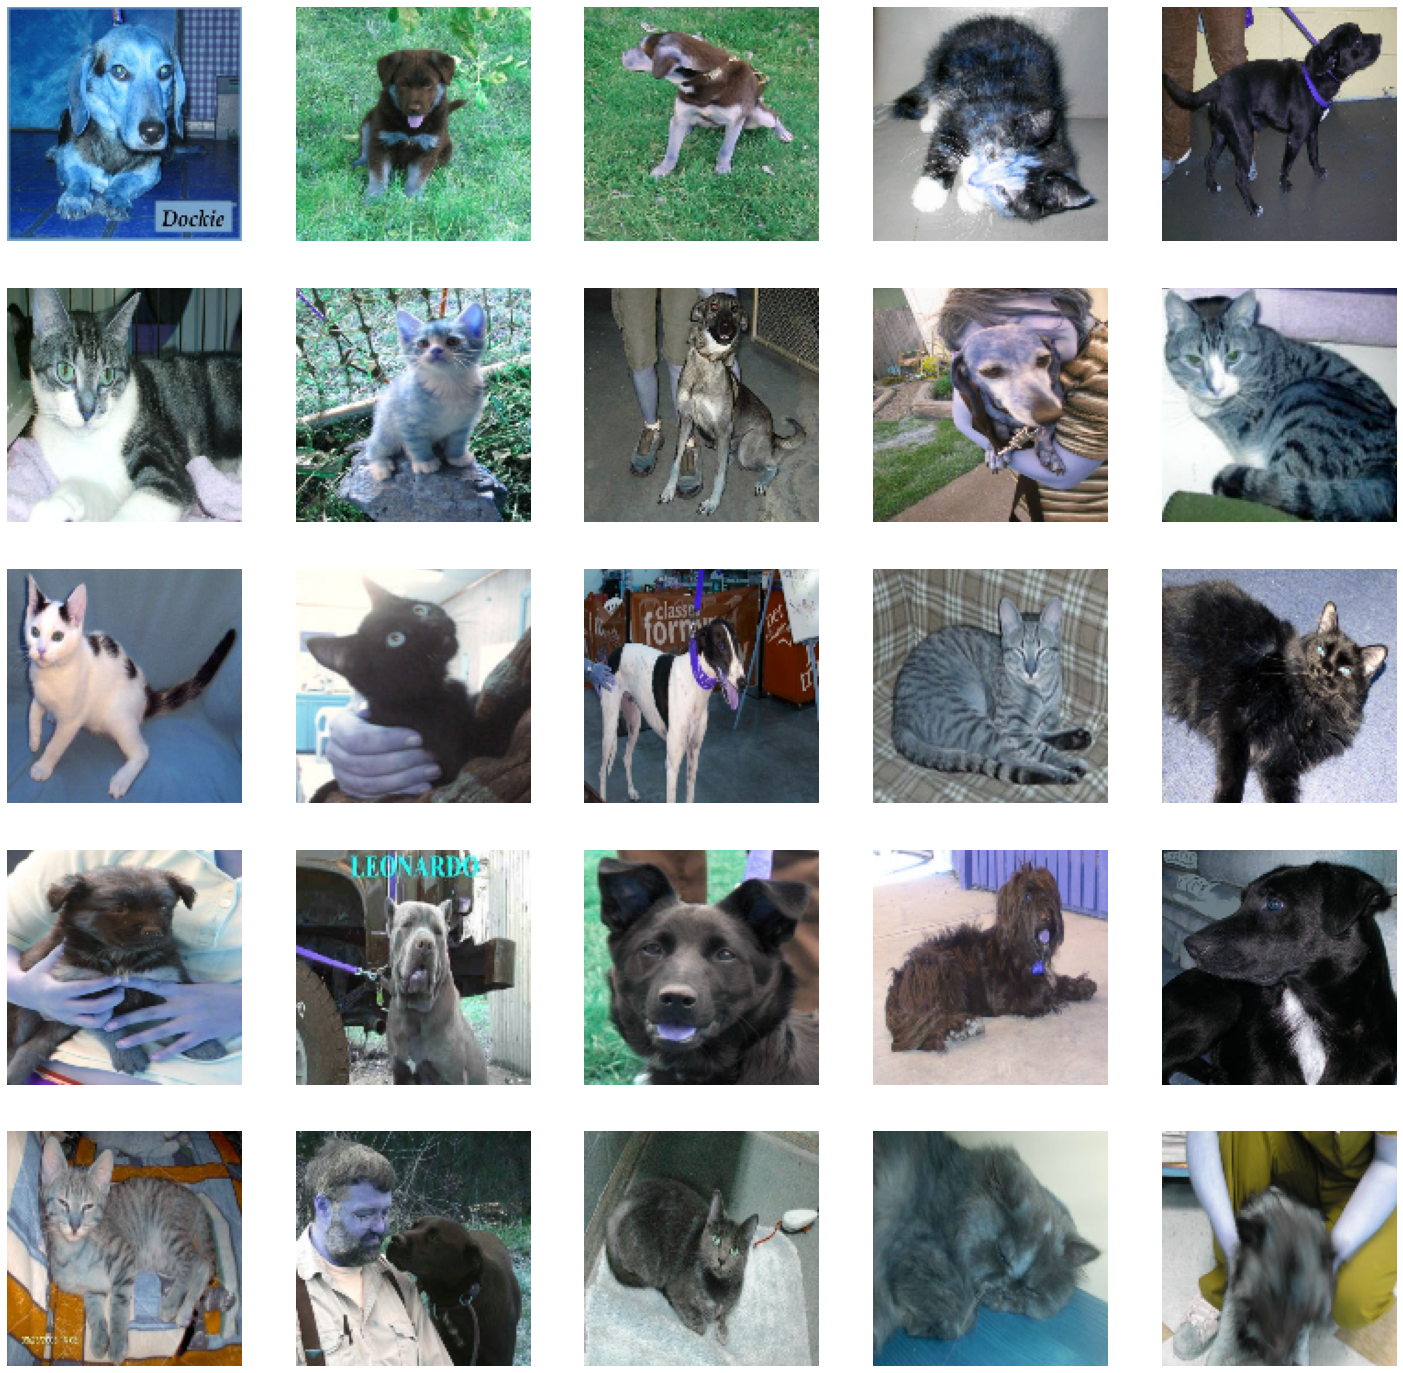

In [10]:
# görüntüler karıştırıldıktan sonraki son 25 görüntü
plt.figure(figsize=(25,25))

for i in range(25):
  plt.subplot(5,5, i+1)
  plt.imshow(X[-i], cmap='gray')
  plt.axis("off")

In [11]:
X[0].shape

(128, 128, 3)

In [12]:
# her görüntü size * size * 3 boyutunda -> 3 RGB fotoğraf olduğu için -> -1 yazınca kaç tane görüntü olduğunu hesaplar
X = np.array(X).reshape(-1,size,size,3) 
Y = np.array(Y).reshape(-1,1)

In [13]:
X = X / 255 # pikselleri 0 - 1 aralığına getirme (normalizasyon)

In [14]:
X.shape

(5000, 128, 128, 3)

# Tranfer Learning (VGG16 Fine Tunning)


In [15]:
from keras.models import Sequential
from keras import layers
from keras.layers import Dropout, Dense, GlobalMaxPooling2D
from tensorflow.keras import optimizers
from tensorflow.keras.applications import VGG16
from keras.models import Model

In [16]:
# Kaggle'dan alıntı : https://www.kaggle.com/code/bulentsiyah/dogs-vs-cats-classification-vgg16-fine-tuning/notebook

image_size = 128
input_shape = (image_size, image_size, 3)

epochs = 5
batch_size = 16

pre_trained_model = VGG16(input_shape=input_shape, include_top=False, weights="imagenet")
    
for layer in pre_trained_model.layers[:15]:
    layer.trainable = False

for layer in pre_trained_model.layers[15:]:
    layer.trainable = True
    
last_layer = pre_trained_model.get_layer('block5_pool')
last_output = last_layer.output
    
# Flatten the output layer to 1 dimension
x = GlobalMaxPooling2D()(last_output)
# Add a fully connected layer with 512 hidden units and ReLU activation
x = Dense(512, activation='relu')(x)
# Add a dropout rate of 0.5
x = Dropout(0.5)(x)
# Add a final sigmoid layer for classification
x = layers.Dense(1, activation='sigmoid')(x)

model = Model(pre_trained_model.input, x)

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.SGD(lr=1e-4, momentum=0.9),
              metrics=['accuracy'])

model.summary()

58900480/58889256 [==============================] - 1s 0us/step
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 128, 128, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 128, 128, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 128, 128, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 64, 64, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 64, 64, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 64, 64, 128)       147584    
                                                              

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


Total params: 14,977,857
Trainable params: 7,342,593
Non-trainable params: 7,635,264
_________________________________________________________________


In [17]:
ind = int(X.shape[0] * 0.8) # görüntülerin %80'i 
ind # görüntülerin %80'ini almak için indeks numarası

4000

In [18]:
model.fit(X[:ind], Y[:ind], batch_size=16, epochs=5, shuffle=True, validation_split=0.1)

Epoch 1/5
225/225 [==============================] - 23s 40ms/step - loss: 0.5358 - accuracy: 0.7167 - val_loss: 0.3497 - val_accuracy: 0.8325
Epoch 2/5
225/225 [==============================] - 9s 39ms/step - loss: 0.3088 - accuracy: 0.8669 - val_loss: 0.2864 - val_accuracy: 0.8650
Epoch 3/5
225/225 [==============================] - 9s 40ms/step - loss: 0.2440 - accuracy: 0.8981 - val_loss: 0.2460 - val_accuracy: 0.8900
Epoch 4/5
225/225 [==============================] - 9s 42ms/step - loss: 0.2107 - accuracy: 0.9117 - val_loss: 0.2299 - val_accuracy: 0.8975
Epoch 5/5
225/225 [==============================] - 9s 40ms/step - loss: 0.1877 - accuracy: 0.9264 - val_loss: 0.2114 - val_accuracy: 0.9025


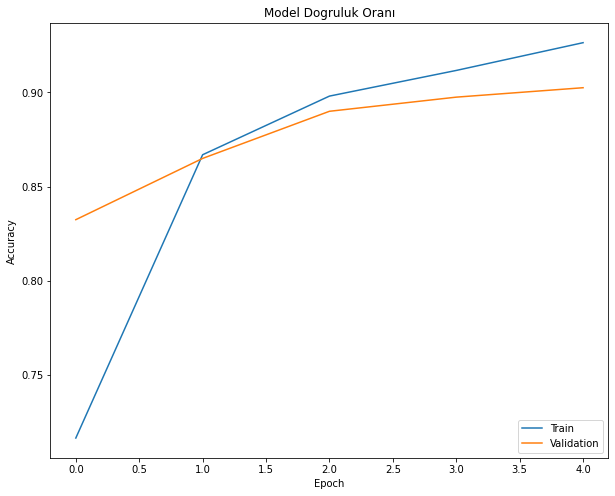

In [19]:
plt.figure(figsize = (10,8))
plt.plot(model.history.history['accuracy'])
plt.plot(model.history.history['val_accuracy'])
plt.title('Model Dogruluk Oranı')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')
plt.savefig('result_21.png',dpi=300)

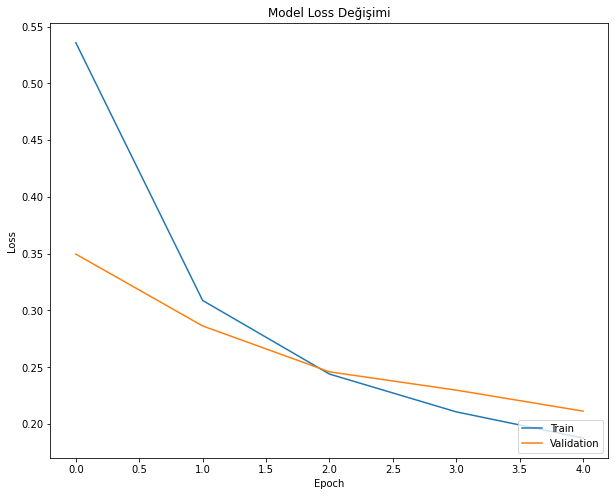

In [20]:
plt.figure(figsize = (10,8))
plt.plot(model.history.history['loss'])
plt.plot(model.history.history['val_loss'])
plt.title('Model Loss Değişimi')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')
plt.savefig('result_22.png',dpi=300)

# Sıfırdan Model Eğitimi

In [21]:
from keras import Sequential
from keras.layers import Conv2D, Activation, BatchNormalization, Flatten, Dense, Dropout, MaxPooling2D
from sklearn.model_selection import train_test_split
from keras.callbacks import ModelCheckpoint

In [22]:
model = Sequential()
model.add(Conv2D(filters = 32, kernel_size= (3,3), input_shape = (128,128,3), activation = 'relu'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(filters = 32, kernel_size= (3,3), activation = 'relu'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(filters = 64, kernel_size= (3,3), activation = 'relu'))
model.add(BatchNormalization())
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 30, 30, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 64)        18496     
                                                                 
 batch_normalization (BatchN  (None, 28, 28, 64)       2

In [23]:
model.compile(loss='binary_crossentropy', optimizer=optimizers.RMSprop(), metrics=['acc'])

model_check = ModelCheckpoint('en_iyi_loss.h5',save_best_only=True,monitor='val_loss',mode='min') # en az val_loss değerine sahip modeli kaydetmek için

In [24]:
ind = int(X.shape[0] * 0.8) # görüntülerin %80'i 
ind2 = int(X.shape[0] * 0.9) # görüntülerin %90'ı

In [25]:
from keras.preprocessing.image import ImageDataGenerator

train_generator = ImageDataGenerator(
    rotation_range = 40,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
    fill_mode = 'nearest'
)

train_iterator = train_generator.flow(
    X[:ind], 
    Y[:ind],
    batch_size=64, 
)

val_generator = ImageDataGenerator()

val_iterator = val_generator.flow(
    X[ind:ind2],
    Y[ind:ind2],
    batch_size=64, 
)


In [26]:
model.fit(train_iterator, epochs=20, validation_data = val_iterator, callbacks=[model_check])

Epoch 1/20
63/63 [==============================] - 16s 233ms/step - loss: 1.3904 - acc: 0.5810 - val_loss: 0.7091 - val_acc: 0.4720
Epoch 2/20
63/63 [==============================] - 14s 222ms/step - loss: 0.6771 - acc: 0.5962 - val_loss: 0.6927 - val_acc: 0.4820
Epoch 3/20
63/63 [==============================] - 14s 215ms/step - loss: 0.6383 - acc: 0.6403 - val_loss: 0.6954 - val_acc: 0.4800
Epoch 4/20
63/63 [==============================] - 14s 215ms/step - loss: 0.5993 - acc: 0.6808 - val_loss: 0.7027 - val_acc: 0.4960
Epoch 5/20
63/63 [==============================] - 14s 223ms/step - loss: 0.6076 - acc: 0.6908 - val_loss: 0.6359 - val_acc: 0.6560
Epoch 6/20
63/63 [==============================] - 15s 234ms/step - loss: 0.5805 - acc: 0.7063 - val_loss: 0.6859 - val_acc: 0.5400
Epoch 7/20
63/63 [==============================] - 14s 222ms/step - loss: 0.5513 - acc: 0.7182 - val_loss: 0.6095 - val_acc: 0.6480
Epoch 8/20
63/63 [==============================] - 14s 223ms/step - 

In [27]:
model.fit(train_iterator, epochs=30, validation_data = val_iterator, callbacks=[model_check])

Epoch 1/30
63/63 [==============================] - 14s 216ms/step - loss: 0.4142 - acc: 0.8098 - val_loss: 4.6320 - val_acc: 0.6240
Epoch 2/30
63/63 [==============================] - 14s 217ms/step - loss: 0.4167 - acc: 0.8177 - val_loss: 0.5195 - val_acc: 0.7800
Epoch 3/30
63/63 [==============================] - 14s 216ms/step - loss: 0.4125 - acc: 0.8100 - val_loss: 0.5084 - val_acc: 0.7960
Epoch 4/30
63/63 [==============================] - 14s 215ms/step - loss: 0.4011 - acc: 0.8207 - val_loss: 0.5536 - val_acc: 0.7460
Epoch 5/30
63/63 [==============================] - 14s 215ms/step - loss: 0.4076 - acc: 0.8213 - val_loss: 0.4673 - val_acc: 0.7760
Epoch 6/30
63/63 [==============================] - 15s 230ms/step - loss: 0.3866 - acc: 0.8242 - val_loss: 0.8343 - val_acc: 0.7760
Epoch 7/30
63/63 [==============================] - 14s 217ms/step - loss: 0.3866 - acc: 0.8240 - val_loss: 1.0410 - val_acc: 0.6900
Epoch 8/30
63/63 [==============================] - 14s 218ms/step - 

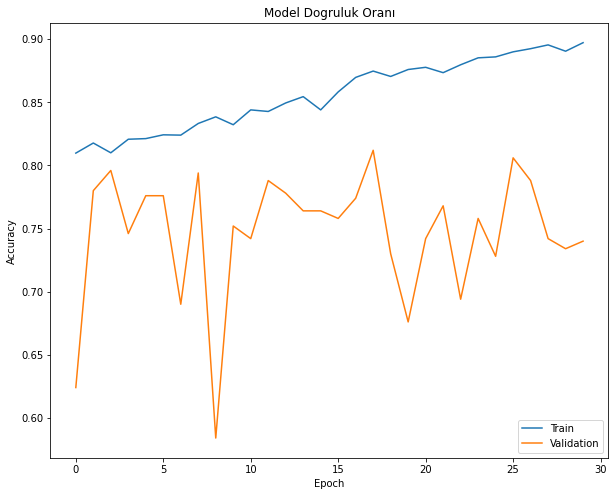

In [28]:
plt.figure(figsize = (10,8))
plt.plot(model.history.history['acc'])
plt.plot(model.history.history['val_acc'])
plt.title('Model Dogruluk Oranı')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')
plt.savefig('result_1.png',dpi=300)

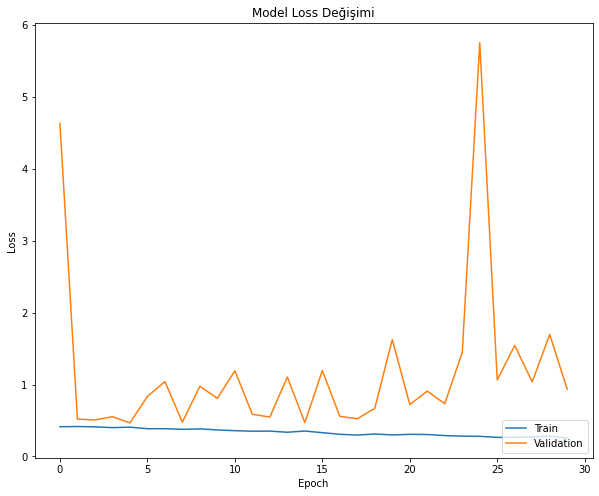

In [29]:
plt.figure(figsize = (10,8))
plt.plot(model.history.history['loss'])
plt.plot(model.history.history['val_loss'])
plt.title('Model Loss Değişimi')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')
plt.savefig('result_2.png',dpi=300)

In [30]:
# en yüksek validation skoru
print(f"The highest val_acc : {max(model.history.history['val_acc'])}")

The highest val_acc : 0.8119999766349792


In [31]:
from keras.models import load_model
en_iyi_loss = load_model('en_iyi_loss.h5') # en az loss değerine sahip modeli yükler

In [32]:
from sklearn.metrics import confusion_matrix, classification_report

# ind2 indeksinden sonrası test verisi olarak tutmuştum, test verisi üzerinde en az loss değerine sahip modelimizi değerlendiriyoruz
print(confusion_matrix(Y[ind2:],en_iyi_loss.predict(X[ind2:]).round()))
print(classification_report(Y[ind2:],en_iyi_loss.predict(X[ind2:]).round()))

[[166  71]
 [ 31 232]]
              precision    recall  f1-score   support

           0       0.84      0.70      0.76       237
           1       0.77      0.88      0.82       263

    accuracy                           0.80       500
   macro avg       0.80      0.79      0.79       500
weighted avg       0.80      0.80      0.79       500



In [33]:
# en son oluşturulan modeli kaydedip Colab'ten bilgisayara indirmek için .zip dosyası haline getiriyoruz
model.save('my_model')
!zip -r model.zip my_model

  adding: my_model/ (stored 0%)
  adding: my_model/saved_model.pb (deflated 89%)
  adding: my_model/assets/ (stored 0%)
  adding: my_model/variables/ (stored 0%)
  adding: my_model/variables/variables.data-00000-of-00001 (deflated 13%)
  adding: my_model/variables/variables.index (deflated 68%)
  adding: my_model/keras_metadata.pb (deflated 92%)


In [34]:
# model.zip dosyasını bilgisayarımıza indirmek için
from google.colab import files
files.download('model.zip') 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>